In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier

In [5]:
#Create dataframe df containing data and 'target' column 
df = pd.read_csv('NFWBS_PUF_2016_data.csv')
#True corresponds to confidence in ability to handle an unexpected financial expense
df['target'] = df['FWB1_1'] > 3

In [74]:
#Remove columns containing financial well being scores and other irrelevant columns
fwb_cols = [col for col in df if col.startswith('FWB')]
swb_cols = [col for col in df if col.startswith('SWB')]
dfx = df.drop(fwb_cols + swb_cols + ['PUF_ID', 'finalwt', 'FSscore', 'target'], axis=1)

#Use a random forest to identify possible top features
X = dfx.values
y = df['FWB1_1'].values

rfc = RandomForestClassifier()
rfc.fit(X, y)
idx = np.argsort(rfc.feature_importances_)[::-1]
dfx.columns[idx][:15]

Index(['target', 'ABSORBSHOCK', 'ENDSMEET', 'SAVINGSRANGES', 'FS1_7', 'ACT1_2',
       'MANAGE1_3', 'FS1_6', 'SAVEHABIT', 'SUBKNOWL1', 'CONNECT', 'FS1_2',
       'GOALCONF', 'PPINCIMP', 'FS1_4'],
      dtype='object')

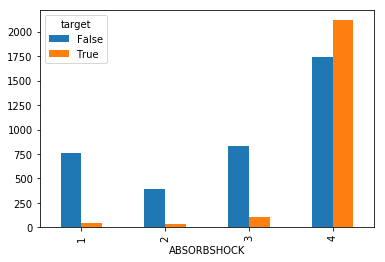

In [20]:
#Remove rows where response was 8 (corresponding to 'I don't know') or -1 (no response)
dfabsorb = df[(df['ABSORBSHOCK'] != 8) & (df['ABSORBSHOCK'] != -1)]
absorb_tab = pd.crosstab(dfabsorb['ABSORBSHOCK'], dfabsorb['target'])
absorb_tab.plot.bar()
plt.show()

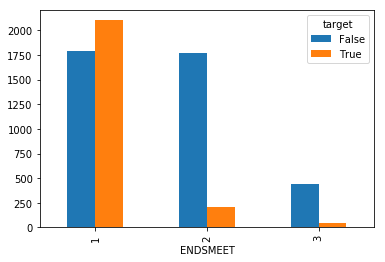

In [19]:
#Remove rows where response was -1 (no response)
dfends = df[df['ENDSMEET'] != -1]
endsmeet_tab = pd.crosstab(dfends['ENDSMEET'], dfends['target'])
endsmeet_tab.plot.bar()
plt.show()

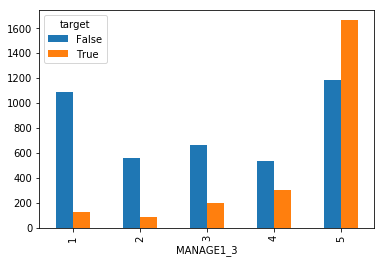

In [18]:
#Remove rows with no response
dfmanage = df[df['MANAGE1_3'] != -1]
manage_tab = pd.crosstab(dfmanage['MANAGE1_3'], dfmanage['target'])
manage_tab.plot.bar()
plt.show()

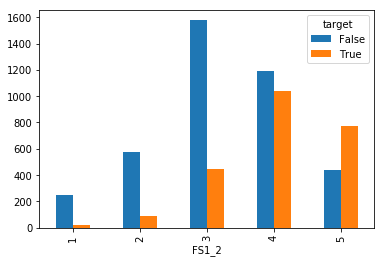

In [17]:
#Remove rows with no response
dfadvice = df[df['FS1_2'] != -1]
advice_tab = pd.crosstab(dfadvice['FS1_2'], dfadvice['target'])
advice_tab.plot.bar()
plt.show()

In [24]:
advice_tab

target,False,True
FS1_2,,
1,244,20
2,571,84
3,1576,449
4,1193,1037
5,436,773
